This notebook illustrate how to permform a Leave p-subjects out (usually, people working in EEG/MEG do a Leav 1-subject out). This notebook will use some notions introduce in the Classification.ipynb notebook
Documentation: https://etiennecmb.github.io/classification.html

# Import librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
# u can use %matplotlib notebook, but there is some bugs with xticks and title

from brainpipe.classification import *
from brainpipe.visual import *

# Create a random dataset
We are going to create a random dataset for a 2 class problem, with n_feature for 4 subjects and a diffrent number of trials for each subject. The quality of decoding of features will be increasing with the ranking, meaning that the first feature is going to be a bad one, the second alittle bit better, the third..., the last, the best one.
## Dataset settings

In [2]:
n_features = 5   # Number of features

## Create datasets

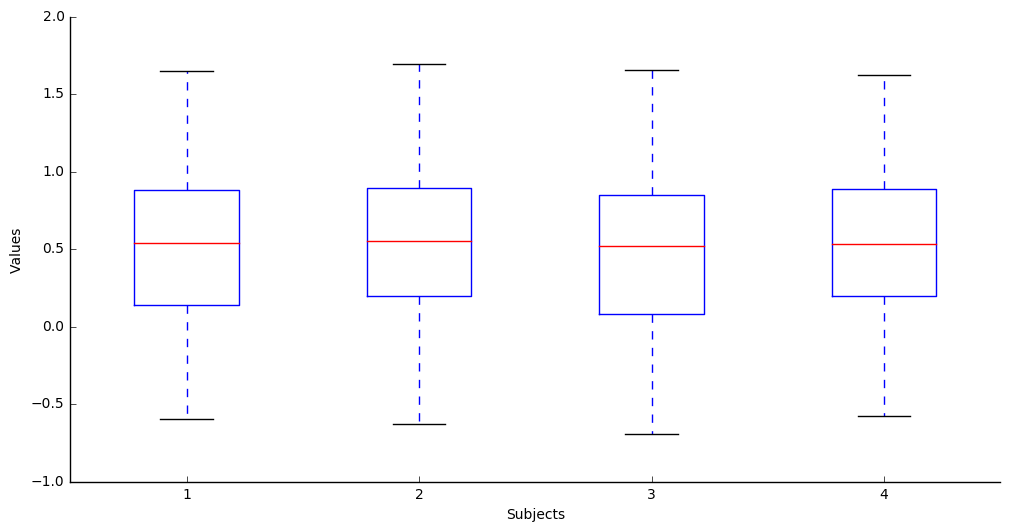

In [3]:
def dataset_pear_subject(ntrials):
    """Create a dataset for each subject. This little function
    will return x and y, the dataset and the label vector of each subject
    """
    spread = np.linspace(0, 0.7, n_features)
    class1 = np.random.uniform(size=(ntrials, n_features)) + spread
    class2 = np.random.uniform(size=(ntrials, n_features)) - spread
    x = np.concatenate((class1, class2), axis=0)
    y = np.ravel([[k]*ntrials for k in np.arange(2)])
    return x, y

# Create a random dataset and a label vector for each subject
x_s1, y_s1 = dataset_pear_subject(20)   # 20 trials for subject 1
x_s2, y_s2 = dataset_pear_subject(25)   # 25 trials for subject 2
x_s3, y_s3 = dataset_pear_subject(18)   # 18 trials for subject 3
x_s4, y_s4 = dataset_pear_subject(10)   # 10 trials for subject 4

# Concatenate all datasets and vectors in list :
x = [x_s1, x_s2, x_s3, x_s4]
y = [y_s1, y_s2, y_s3, y_s4]

# Plot each subject dataset:
plt.figure(0, figsize=(12,6))
plt.boxplot(x);
rmaxis(plt.gca(), ['top', 'right']);
plt.xlabel('Subjects'), plt.ylabel('Values');

In [15]:
print(y)

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]


# Classification
## Define a classifier and the leave p-subject out cross-validation

In [6]:
# Classification object :
lpso = LeavePSubjectOut(y, 4, pout=1, clf='svm', kern='linear') # Leave ONE-subject out (pout)

# Run classification :
da, pvalue, daperm = lpso.fit(x, n_perm=20, method='label_rnd')

OKIIIIIIIIIIIIIIii


PicklingError: Can't pickle <class 'brainpipe.clf._lpso.LeavePSubjectOut'>: it's not the same object as brainpipe.clf._lpso.LeavePSubjectOut

## Plot your results
### Plot decoding

Settings SVM-linear / Leave 1 subjects out                                \
Results                             DA (%) STD (+/-) p-values (Binomial)   
0                                56.849315       0.0        4.093087e-02   
1                                68.493151       0.0        2.053442e-06   
2                                80.136986       0.0        1.199041e-14   
3                                98.630137       0.0        1.110223e-16   
4                               100.000000       0.0        0.000000e+00   

Settings                                
Results  p-values (Permutations) Group  
0                           0.05   0.0  
1                           0.05   1.0  
2                           0.05   2.0  
3                           0.05   3.0  
4                           0.05   4.0

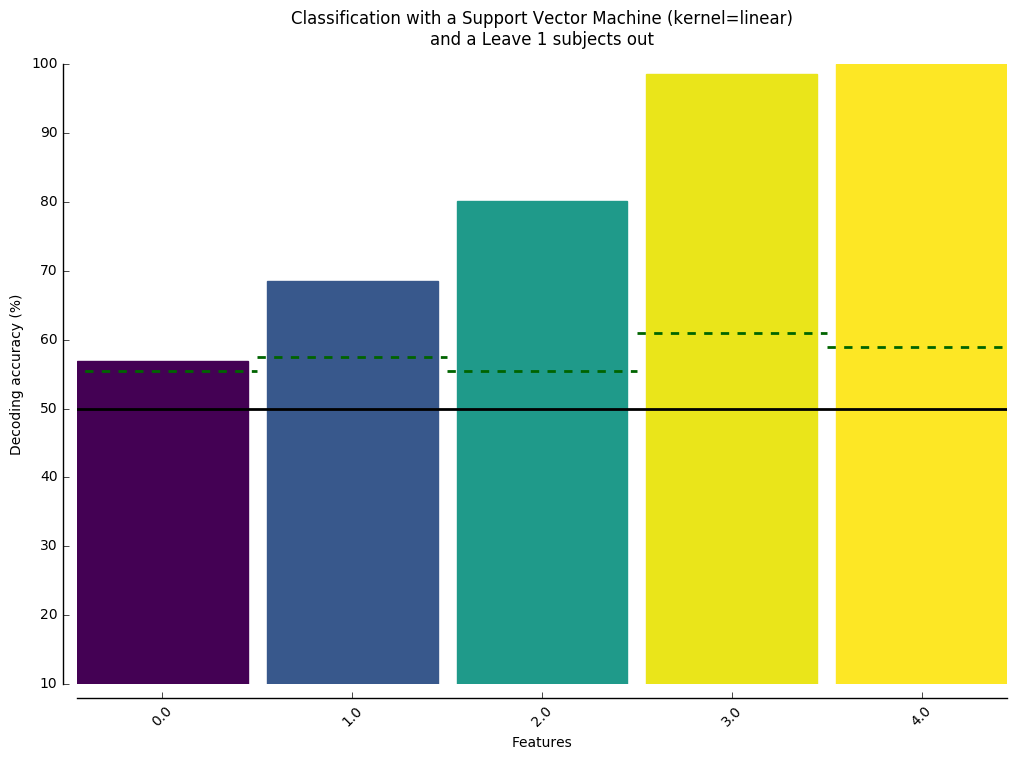

In [5]:
plt.figure(1, figsize=(12,8))

lpso.daplot(da, daperm=daperm, chance_method='perm', rmax=['top', 'right'],
            dpax=['bottom', 'left'], cmap='viridis', ylim=[10,100], chance_unique=False,
            chance_color='darkgreen')

# Display informations about features :
lpso.info.featinfo

# A little bit of stat (not to much)
Ok, you have your true decoding accuracies, the pvalues and the decoding of all permutations. Inside the classification object lpso, there is some sub-methods for advanced statistics. So, take a look at lpso.stat.

As an example, say that you need to find the p=0.05 corresponding decoding accuracy in the permutation and for each feature:

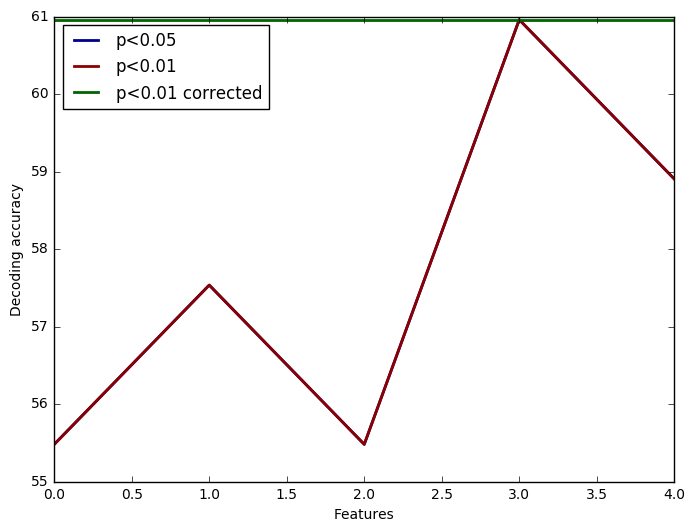

In [7]:
# p<0.05
dap05 = lpso.stat.perm_pvalue2da(daperm, p=0.05)
# p<0.01
dap01 = lpso.stat.perm_pvalue2da(daperm, p=0.01)
# p<0.01 with maximum statistics correction
dap_01corrected = lpso.stat.perm_pvalue2da(daperm, p=0.01, maxst=True)

plt.figure(2, figsize=(8, 6))
plt.plot(dap05, lw=2, color='darkblue', label='p<0.05')
plt.plot(dap01, lw=2, color='darkred', label='p<0.01')
plt.plot(dap_01corrected, lw=2, color='darkgreen', label='p<0.01 corrected')
plt.xlabel('Features'), plt.ylabel('Decoding accuracy')
plt.legend(loc=0)

# Grouping witth the Leave p-subject out
## The group parameter and multi-features
Previously, we saw how to classify each feature separatly. Now we are going to see how to group features. In this example, we defined 15 features. So, we are going to define 3 groups features
- 'Group1: the bad one': the 5 first
- 'Group2: the middle one': the 3 following
- 'Group3: the best one': the last 7 features

In [7]:
# Define the group parameter :
grp = ['Group1: the bad one']*5 + ['Group2: the middle one']*3 + ['Group3: the best one']*7

# Change the current classifier :
da2, pvlue2, daperm2 = lpso.fit(x, n_perm=50, grp=grp, method='label_rnd', center=True)

## Plot the grouping decoding

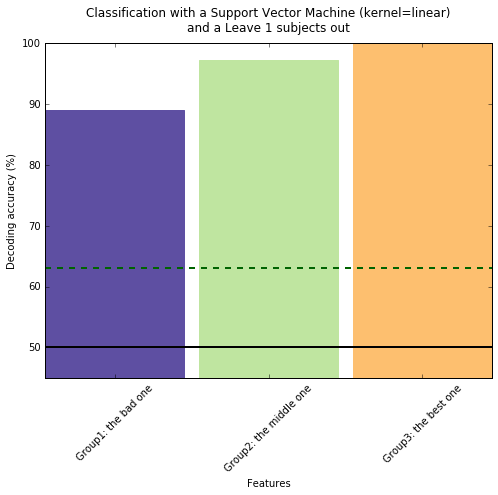

In [8]:
plt.figure(3, figsize=(8, 6))
lpso.daplot(da2, cmap='Spectral_r', ylim=[45, 100], chance_method='perm',
                daperm=daperm2, chance_color='darkgreen');
lpso.info.featinfo

# Export tables to a excel file:
lpso.info.to_excel('Leave_p-subject_Out.xlsx')

As we can see above, the classification is applied on each group. The mf parameter of the fit() function is just a shortcut to say that all features have to be consider together. 
U can use the grp parameter for:
- Grouping features together
- Labelize each one/group to have nice tables and plot